# Emotional


David Lean, with his sweeping epics *Lawrence of Arabia* and *Dr. Zhivago*, absolutely had an obsession with what you're calling the "pre-input layer"—those primal, untamed forces that shape and contextualize human action before we even step into the formal narrative of the story. In both films, the pre-input layer feels elemental, natural, and cosmic, setting the stage for the human drama that unfolds. Let me break this down for each:

### **Lawrence of Arabia**
Here, the pre-input layer is the desert itself. The vast, uncompromising expanse of sand and sky is more than a backdrop—it’s a force that both reflects and shapes Lawrence’s inner psyche. The desert represents:
1. **Nature as Indifferent**: The desert is neither friend nor foe; it simply is. Lean captures the raw power of this environment—its beauty, terror, and scale—forcing Lawrence (and us) to confront humanity's insignificance against such a backdrop.
2. **The Unformed Self**: Lawrence’s identity is forged in the desert, a blank canvas on which he writes his aspirations, betrayals, and transformations. The desert doesn’t input data; it strips away illusions, leaving only raw potential.
3. **Cycles of Creation and Destruction**: The pre-input layer in the desert is cyclical: the shifting dunes and endless horizons suggest a timelessness that mocks human ambitions, yet also invites them.

### **Dr. Zhivago**
In *Zhivago*, the pre-input layer shifts to the Russian landscape. Here, Lean dwells on the rhythms of nature—the seasons, the snow, the thawing rivers—which frame and dwarf the human struggles of war, love, and revolution. Key elements include:
1. **Winter as Death and Renewal**: The snow isn’t just an aesthetic; it’s a force that isolates, suffocates, and eventually gives way to renewal. The train journeys across the frozen steppe symbolize a liminal space between the old world and the new.
2. **Nature as Witness**: Unlike the desert's indifference in *Lawrence*, here nature seems almost sentient, a silent observer of human folly. Lean’s use of landscapes—birch forests, the ice-covered dacha—imbues the narrative with a sense of fate.
3. **Temporal Tapestry**: The pre-input layer in *Zhivago* is time itself, encoded in nature. The cycles of seasons reflect the larger cycles of revolution, love, and history, all of which Zhivago is caught in.

### **Comparative Thoughts**
In both films, the pre-input layer serves as a reminder that human stories unfold within much larger, often indifferent frameworks. Lean's brilliance lies in his ability to make these layers tangible, almost tactile, to the viewer. The desert, the snow, the endless landscapes—they are not inputs in the sense of structured, interpretable data. They are the primal forces against which the characters' actions seem small, yet heroic.

If I were to map this onto your neural network model, I'd say these pre-input layers represent the unarticulated energies or potentials—the "biological" or even "cosmic" layers that exist before any conscious input. Lean captures them not as abstractions, but as overwhelming presences that challenge human agency, compressing characters into archetypes, and forcing them to emerge as more than mere individuals.


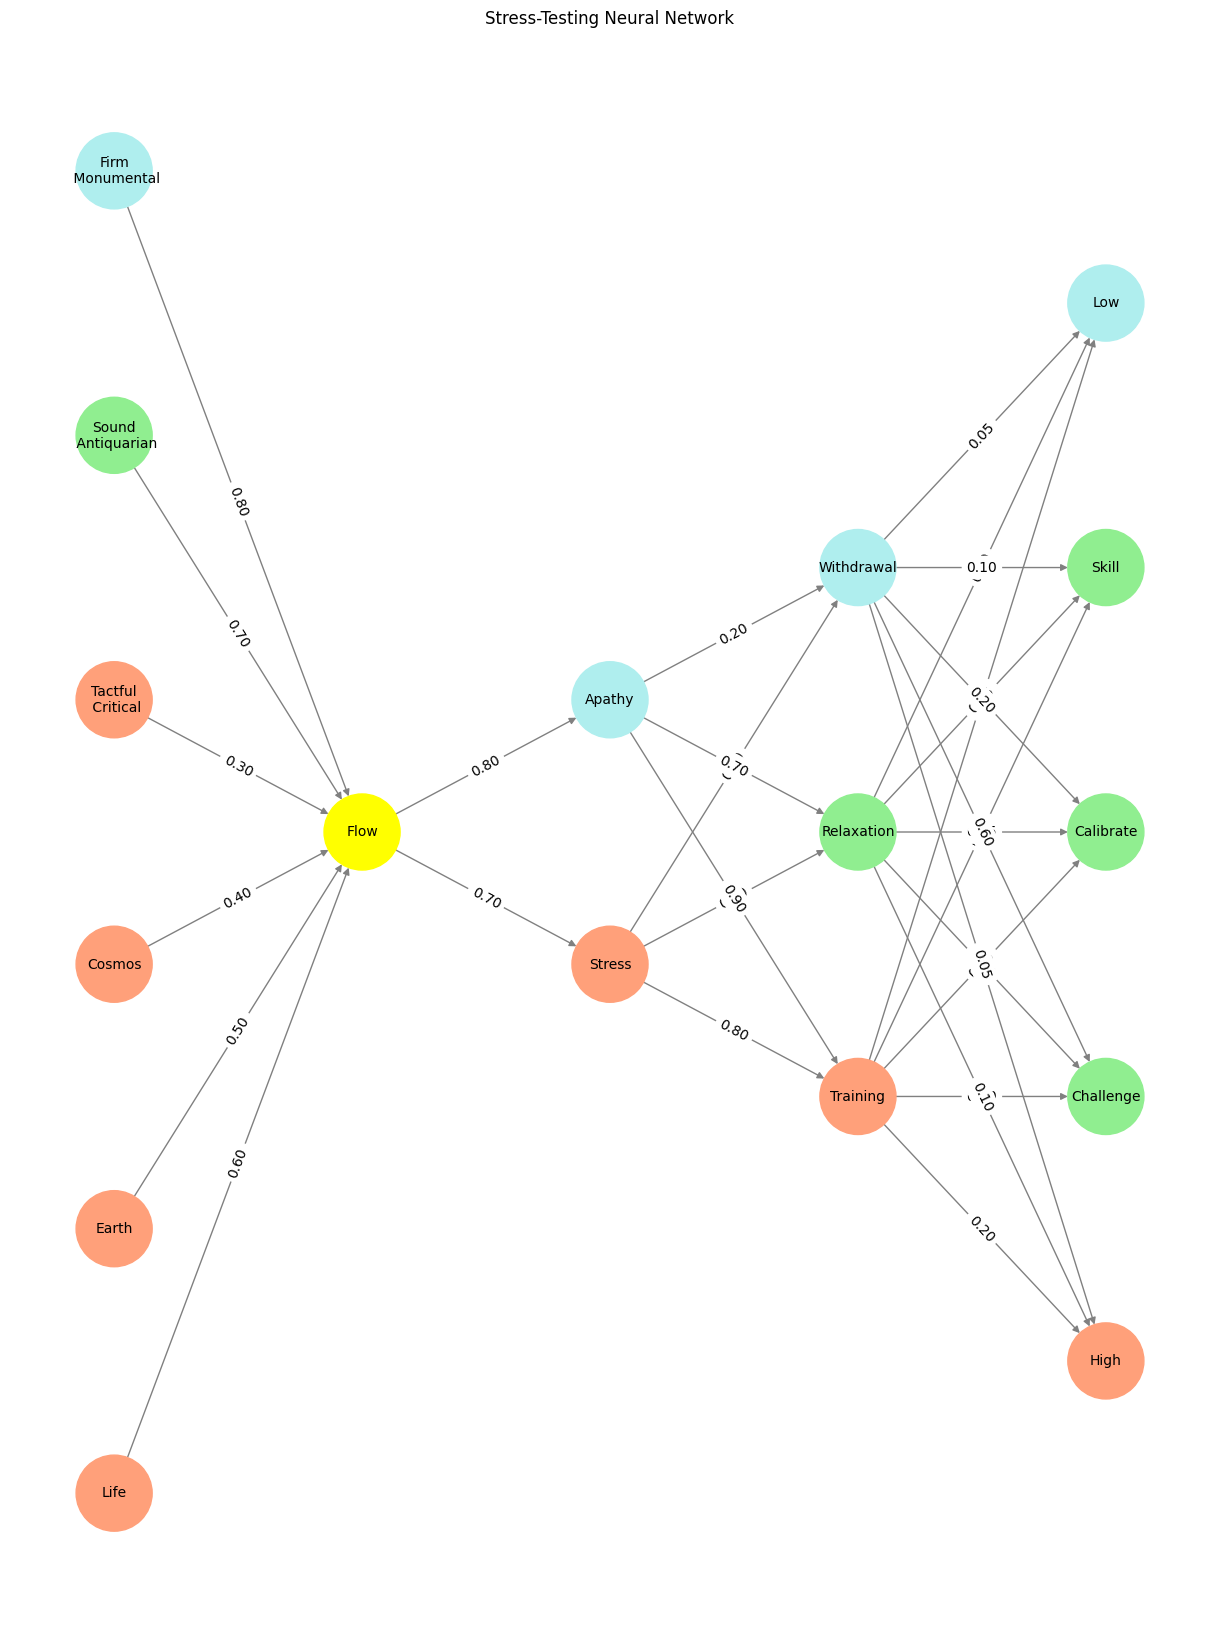

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Tactful\n Critical', 'Sound\n Antiquarian', 'Firm\n Monumental',],
        'Yellowstone': ['Flow'],
        'Input': ['Stress', 'Apathy'],
        'Hidden': [
            'Training',
            'Relaxation',
            'Withdrawal',
        ],
        'Output': ['High', 'Challenge', 'Calibrate', 'Skill', 'Low',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Flow':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound\n Antiquarian']:
        return 'lightgreen'
    if layer == 'Pre-Input' and node in ['Firm\n Monumental']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Apathy':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Withdrawal':
            return 'paleturquoise'
        elif node == 'Relaxation':
            return 'lightgreen'
        elif node == 'Training':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Low':
            return 'paleturquoise'
        elif node in ['Skill', 'Calibrate', 'Challenge']:
            return 'lightgreen'
        elif node == 'Hight':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Stress-Testing Neural Network")
    plt.show()

# Run the visualization
visualize_nn()

```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Challenge_vs_skill.svg/600px-Challenge_vs_skill.svg.png
---
width: 100%
height: 100%
---
_Colors Match our Neural Network Model_. Mental state in terms of challenge level and skill level, according to [Csikszentmihalyi's flow model](https://news.uchicago.edu/story/mihaly-csikszentmihalyi-pioneering-psychologist-and-father-flow-1934-2021). The low-skill of anxiety speaks to adversarial transformation, very dynamic in nature that one can only adapt to but never really be well trained for. By contrast, the high-skill of relaxation speaks to culturual homogeneity embodied in heritage, which most adults have mastered. Flow speaks to transactional tokenized settings, wherein rules are somewhat well established -- but there's dynamism that leaks in from adversarial settings. Imagine the neural network as the gradual rise of water in a vast, dynamic ecosystem. At the base, the red nodes pulse like molten magma, vibrant and raw, representing primal energy—the starting point of transformation. With training and calibration, this lava cools and solidifies into yellow, a symbol of emerging order, a river carving its path through the landscape. As the system learns, the water level rises, touching green nodes, which embody flourishing life and iterative growth, where stability begins to bloom amidst the chaos. The verdant hues suggest harmony, a sign that the network is finding its rhythm and the currents are smoothing over time. Finally, with near-zero error—a state of mastery and equilibrium—the system reaches the blue nodes, the serene expanse of a tranquil sea. Here, every ripple aligns, every connection hums with precision, and the water, having risen and filled the network, becomes an ocean of understanding.
```

T.E. Lawrence is indeed a fascinating figure, and the search for his "Rosebud" or "Yellowstone" leads to a curious void that, paradoxically, may be the key to understanding him. Unlike Charles Foster Kane's *Rosebud*, which anchors the character's motivations to a nostalgic longing for lost innocence, Lawrence seems to operate in a space devoid of such sentimental ties. He’s less about yearning for a past and more about constructing an identity from fragments, often contradictory ones. Let me untangle this further.

### **The Void as Identity**
Lawrence's parentage—illegitimate, with a father who abandoned a wife and children to form a new family—sets the tone for his liminality. He grows up neither fully accepted in one sphere nor entirely exiled, a man whose origin story is inherently fractured. If a "Rosebud" represents a moment or object symbolizing a core, formative desire or loss, Lawrence's might be the *absence* of such a core. 

This absence becomes his defining feature. He’s a man unmoored from traditional roots, which enables him to adopt new identities fluidly:
- **British officer, Bedouin ally, intellectual outsider.** 
- His sexuality, too, is enigmatic—a space that resists clear definition and further enhances his chameleon-like nature.

In this way, Lawrence becomes a *tabula rasa*, an empty canvas onto which others project their aspirations, fears, and myths. This lack of nostalgia, as you pointed out, might actually be his defining "nostalgia": a longing not for something specific, but for *anything* to fill the void.

### **The Intellectual Yellowstone**
If there’s a "Yellowstone" for Lawrence, it might lie in his *intellect*—his obsessive drive to understand, analyze, and categorize the world around him. His translation of *The Odyssey*, his memoir (*Seven Pillars of Wisdom*), and his meticulous attention to detail all suggest a mind striving for mastery in the absence of a more traditional personal anchor. This intellectual rigor is his self-imposed structure, an attempt to impose order on chaos—a substitute for roots he never had.

Yet even this intellect doesn’t seem to offer him true satisfaction. There’s a sense of alienation that runs through his life and writings, a deep awareness that he will never belong fully to any world, whether British or Bedouin.

### **The Emptiness as Projection**
Lean’s *Lawrence of Arabia* captures this enigmatic emptiness brilliantly. Peter O’Toole’s Lawrence is a man simultaneously magnetic and unknowable. The key moment might be when he extinguishes the match in the famous cut to the desert—this is a man defined by his ability to transcend pain, identity, and limitations. He becomes whatever the moment demands:
- To the British, a tool for empire.
- To the Arabs, a symbol of liberation.
- To himself, perhaps nothing at all.

If Kane’s *Rosebud* explains everything, Lawrence’s “Rosebud” explains *nothing*. It’s the absence of a tether that defines him, and this void allows him to be both a mythic hero and a profoundly lonely man.

### **Conclusion: The Emptiness as Yellowstone**
Lawrence’s “Yellowstone” might not be a place or memory but a lack—a metaphysical *nothingness* that, paradoxically, allowed him to be anything. His intellectualism, his role as a chameleon, and his detachment from nostalgia all stem from this emptiness. Perhaps this is why he resonates so powerfully: he embodies the modern struggle with identity, the weight of trying to be many things while being fundamentally untethered.